In [3]:
#Description:This program attempts to optimize a users portfolio using the Efficient Frontier

In [4]:
#import libaries
from pandas_datareader  import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [30]:
#Get the stock symbols/tickers in the portfolio
#FAANG
assets = ['AAPL', 'IBM', 'MSFT', 'WMT']

In [53]:
#Assign weight to the stocks 
weights=np.array([0.25,0.25,0.25,0.25])

In [12]:
#Get the stock/portfolio starting date
stockStartDate='2017-01-01'

In [10]:
#Get the stocks ending date (today)
today='2022-12-30'
today

'2022-12-30'

In [15]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.3 MB/s 
     |████████████████████████████████| 112 kB 9.7 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 128 kB 62.5 MB/s 
     |████████████████████████████████| 4.0 MB 59.8 MB/s 
     |████████████████████████████████| 110 kB 66.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [25]:
import yfinance as yf
df=pd.DataFrame()
hist=yf.Ticker('AAPL')
df=hist.history(period='5y',auto_adjust='True')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-28 00:00:00-05:00,52.580002,52.737499,52.238499,52.407001,16742000,0.0,0.0
2017-12-29 00:00:00-05:00,52.335999,52.485001,52.244999,52.320000,17750000,0.0,0.0
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
...,...,...,...,...,...,...,...
2022-12-20 00:00:00-05:00,88.730003,89.779999,88.040001,89.629997,21976800,0.0,0.0
2022-12-21 00:00:00-05:00,89.730003,90.915001,88.910004,90.250000,20336400,0.0,0.0
2022-12-22 00:00:00-05:00,88.930000,89.180000,86.940002,88.260002,23656100,0.0,0.0


In [17]:
hist=yf.Ticker('GOOG')
mf=hist.history(period='5y',auto_adjust='True')
mf

In [38]:
import yfinance as yf
import pandas as pd

# Set the start and end date
start_date = '2013-01-01'
end_date = today

# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
data
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,WMT
Date,,,,
2013-01-02,16.862818,127.031830,22.774689,55.454227
2013-01-03,16.649977,126.333145,22.469595,55.101830
2013-01-04,16.186203,125.504982,22.049063,55.310059
2013-01-07,16.090984,124.955086,22.007833,54.781471
2013-01-08,16.134293,124.780396,21.892393,54.933640
...,...,...,...,...
2022-12-20,132.300003,141.279999,241.800003,144.050003
2022-12-21,135.449997,142.139999,244.429993,145.179993
2022-12-22,132.229996,140.880005,238.190002,143.479996


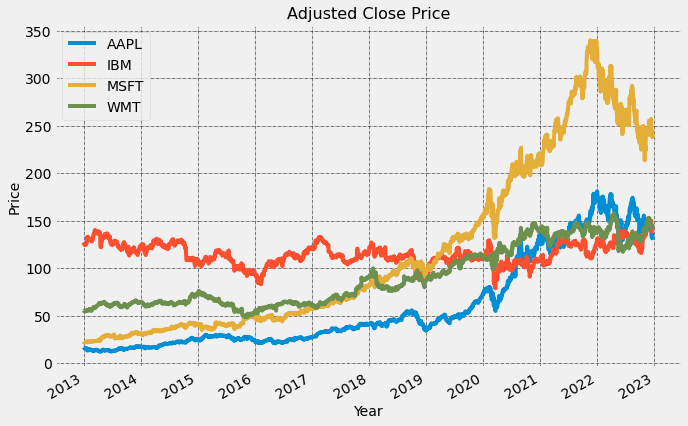

In [39]:
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [40]:
#show the return 
returns=data.pct_change()
returns

,AAPL,IBM,MSFT,WMT
Date,,,,
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,-0.005500,-0.013396,-0.006355
2013-01-04,-0.027854,-0.006555,-0.018716,0.003779
2013-01-07,-0.005883,-0.004381,-0.001870,-0.009557
2013-01-08,0.002691,-0.001398,-0.005245,0.002778
...,...,...,...,...
2022-12-20,-0.000529,0.017354,0.005614,0.008754
2022-12-21,0.023809,0.006087,0.010877,0.007844
2022-12-22,-0.023773,-0.008864,-0.025529,-0.011710


In [41]:
#create and show the annualise covariance matrix
cov_matrix_annual= returns.cov()* 252
cov_matrix_annual

,AAPL,IBM,MSFT,WMT
AAPL,0.084389,0.026916,0.049279,0.018609
IBM,0.026916,0.055137,0.028835,0.014523
MSFT,0.049279,0.028835,0.073084,0.019602
WMT,0.018609,0.014523,0.019602,0.042240


In [54]:
#calculate the portfolio variance
import numpy as np
p=np.dot(cov_matrix_annual,weights)
port_variance = np.dot(weights.T,p)
port_variance

0.03564858465647487

In [56]:
#calculate portfolio votalility a.k.a standard variance
port_volatility= np.sqrt(port_variance)
port_volatility

0.1888083278260651

In [57]:
portfolioSimpleannualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleannualReturn

0.16859650008306326

In [60]:
percent_var=str(round(port_variance,2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleannualReturn,2)*100)+'%'
print('Expected annual return:'+percent_var)
print('Expected votality / Risk:'+percent_vols)
print('Expected variance:'+percent_ret)

Expected annual return:4.0%
Expected votality / Risk:19.0%
Expected variance:17.0%


In [61]:
pip install PyPortfolioOpt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 392 kB/s 
     |████████████████████████████████| 17.3 MB 681 kB/s 
     |████████████████████████████████| 16.9 MB 59.7 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


In [63]:
from pypfopt.efficient_frontier import efficient_frontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [69]:
from pypfopt.efficient_frontier.efficient_semivariance import EfficientFrontier
#portfolio Optimization
#calculate the expexted return
mu=expected_returns.mean_historical_return(data)
S=risk_models.sample_cov(data)

#optimize for max sharp ratio
ef=EfficientFrontier(mu, S)
weights= ef.max_sharpe()
cleaned_weights= ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose= True)



OrderedDict([('AAPL', 0.20907), ('IBM', 0.0), ('MSFT', 0.7177), ('WMT', 0.07323)])
Expected annual return: 24.5%
Annual volatility: 24.3%
Sharpe Ratio: 0.93


(0.2447737736414217, 0.24285608113388354, 0.9255431142261853)

In [76]:
#get the discrete allocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(data)
weights= cleaned_weights
da=DiscreteAllocation(weights,latest_prices,total_portfolio_value= 1500)
allocation, leftover=da.lp_portfolio()
print('Discrete allocation:',allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'IBM': 1, 'MSFT': 5, 'WMT': 1}
Funds remaining: $28.97
